[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


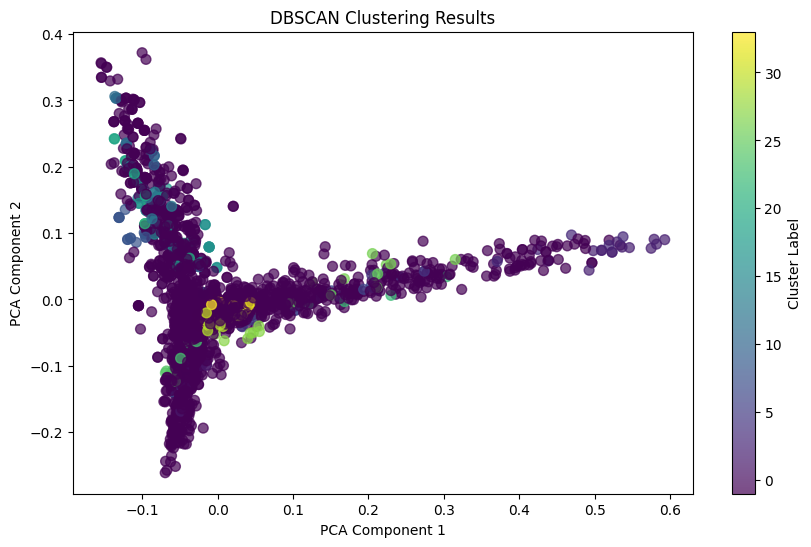

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Download NLTK data if not already done
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset (modify the file path if needed)
# Assuming the dataset is a text file with one article per line
dataset_path = 'news dataset.csv'  # Replace with your dataset path
with open(dataset_path, 'r', encoding='utf-8') as file:
    articles = file.readlines()

# Create a DataFrame from the articles
data = pd.DataFrame({'article_text': articles})

# Display the first few rows of the dataset
data.head()

# Preprocessing text
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['processed_text'] = data['article_text'].apply(preprocess_text)

# Display the first few processed texts
data[['article_text', 'processed_text']].head()

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_text'])

# Apply DBSCAN clustering
similarity_matrix = cosine_similarity(X)
clustering_model = DBSCAN(metric='precomputed', eps=0.5, min_samples=5)

# Ensure the distance matrix has only non-negative values:
distance_matrix = 1 - similarity_matrix
distance_matrix[distance_matrix < 0] = 0 # clip negative values to 0

labels = clustering_model.fit_predict(distance_matrix)
# Add cluster labels to the dataset
data['cluster'] = labels

# Display the clustering results
data[['article_text', 'cluster']].head()

# Visualize the clustering results using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [2]:
# Display the first few processed texts
data[['article_text', 'processed_text']].head()

,article_text,processed_text
0,",description,tags\n",description tags
1,"0,chelsea sack mutu chelsea have sacked adria...",0 chelsea sack mutu chelsea sacked adrian mutu...
2,"1,record fails to lift lacklustre meet yelena...",1 record fails lift lacklustre meet yelena isi...
3,"2,edu describes tunnel fracas arsenals edu ha...",2 edu describes tunnel fracas arsenals edu lif...
4,"3,ogara revels in ireland victory ireland fly...",3 ogara revels ireland victory ireland flyhalf...


In [3]:

# Display the clustering results
data[['article_text', 'cluster']].head()

,article_text,cluster
0,",description,tags\n",-1
1,"0,chelsea sack mutu chelsea have sacked adria...",-1
2,"1,record fails to lift lacklustre meet yelena...",-1
3,"2,edu describes tunnel fracas arsenals edu ha...",-1
4,"3,ogara revels in ireland victory ireland fly...",-1


In [4]:
# Display the first few rows of the dataset
data.head()

,article_text,processed_text,cluster
0,",description,tags\n",description tags,-1
1,"0,chelsea sack mutu chelsea have sacked adria...",0 chelsea sack mutu chelsea sacked adrian mutu...,-1
2,"1,record fails to lift lacklustre meet yelena...",1 record fails lift lacklustre meet yelena isi...,-1
3,"2,edu describes tunnel fracas arsenals edu ha...",2 edu describes tunnel fracas arsenals edu lif...,-1
4,"3,ogara revels in ireland victory ireland fly...",3 ogara revels ireland victory ireland flyhalf...,-1


In [5]:
# write csv 
data.to_csv('news_dataset.csv', index=False)
